### Start EVA server

We are reusing the start server notebook for launching the EVA server.

In [11]:
%run 00-start-server.ipynb
cursor = launch_eva_server()

rm: cannot remove 'nohup.out': No such file or directory
cat: nohup.out: No such file or directory


22/09/11 20:09:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/09/11 20:09:57 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/09/11 20:09:57 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
09-11-2022 20:09:58 WARNING[create_udf_executor:create_udf_executor.py:exec:0042] UDF FastRCNNObjectDetector already exists, nothing added.
09-11-2022 20:09:58 WARNING[create_udf_executor:create_udf_executor.py:exec:0042] UDF Array_Count already exists, nothing added.
09-11-2022 20:09:58 WARNING[create_udf_executor:create_udf_executor.py:exec:0042] UDF Crop already exists, nothing added.
09-11-2022 20:09:58 WARNING[create_udf_executor:create_udf

### Upload the Video for analysis

In [5]:
cursor.execute('DROP TABLE MNISTVid')
response = cursor.fetch_all()
print(response)
cursor.execute('LOAD FILE "../data/mnist/mnist.mp4" INTO MNISTVid')
response = cursor.fetch_all()
print(response)

@status: 0
@batch: Batch Object:
@dataframe:                                       0
0  Table Successfully dropped: MNISTVid
@batch_size: 1
@identifier_column: None
@query_time: 0.02410768810659647
@status: 0
@batch: Batch Object:
@dataframe:                                                    0
0  Video successfully added at location: ../data/...
@batch_size: 1
@identifier_column: None
@query_time: 0.022128933109343052


09-11-2022 20:05:43 ERROR [opencv_storage_engine:opencv_storage_engine.py:drop:0057] Failed to drop the video table [Errno 2] No such file or directory: '/home/jarulraj3/.eva/eva_datasets/66f5448499b48407c4f34e75ef565d8f'
Traceback (most recent call last):
  File "/nethome/jarulraj3/eva/test_evadb/lib/python3.8/site-packages/eva/storage/opencv_storage_engine.py", line 55, in drop
    shutil.rmtree(str(dir_path))
  File "/usr/lib/python3.8/shutil.py", line 709, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.8/shutil.py", line 707, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: '/home/jarulraj3/.eva/eva_datasets/66f5448499b48407c4f34e75ef565d8f'
09-11-2022 20:05:43 ERROR [drop_executor:drop_executor.py:exec:0059] Failed to drop TABLE REF:: ( MNISTVid SAMPLE FREQUENCY None)
NoneType: None


### Visualize Video

In [6]:
from IPython.display import Video
Video("../data/mnist/mnist.mp4", embed=True)

### Create an user-defined function (UDF) for analyzing the frames

In [8]:
cursor.execute("""CREATE UDF IF NOT EXISTS MnistCNN
                  INPUT  (data NDARRAY (3, 28, 28))
                  OUTPUT (label TEXT(2))
                  TYPE  Classification
                  IMPL  'apps/mnist/eva_mnist_udf.py';
        """)
response = cursor.fetch_all()
print(response)

@status: 0
@batch: Batch Object:
@dataframe:                                                   0
0  UDF MnistCNN successfully added to the database.
@batch_size: 1
@identifier_column: None
@query_time: 0.03236587066203356


09-11-2022 20:06:08 WARNING[generic_utils:generic_utils.py:path_to_class:0060] /home/jarulraj3/eva/tutorials/apps/mnist/eva_mnist_udf.py
09-11-2022 20:06:08 WARNING[generic_utils:generic_utils.py:path_to_class:0062] /home/jarulraj3/eva/tutorials/apps/mnist/eva_mnist_udf.py


### Run the Image Classification UDF on video

In [9]:
cursor.execute("""SELECT data, MnistCNN(data).label FROM MNISTVid""")
response = cursor.fetch_all()
print(response.batch)

09-11-2022 20:06:10 WARNING[generic_utils:generic_utils.py:path_to_class:0060] /home/jarulraj3/eva/tutorials/apps/mnist/eva_mnist_udf.py
09-11-2022 20:06:10 WARNING[generic_utils:generic_utils.py:path_to_class:0062] /home/jarulraj3/eva/tutorials/apps/mnist/eva_mnist_udf.py


Batch Object:
@dataframe:                                           mnistvid.data  mnistcnn.label
0     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...               6
1     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...               6
2     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...               6
3     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...               6
4     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...               6
...                                                 ...             ...
1195  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...               6
1196  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...               6
1197  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...               6
1198  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...               6
1199  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...               6

[1200 rows x 2 columns]
@batch_size: 1200
@identifier_column: None


### Visualize output of query on the video

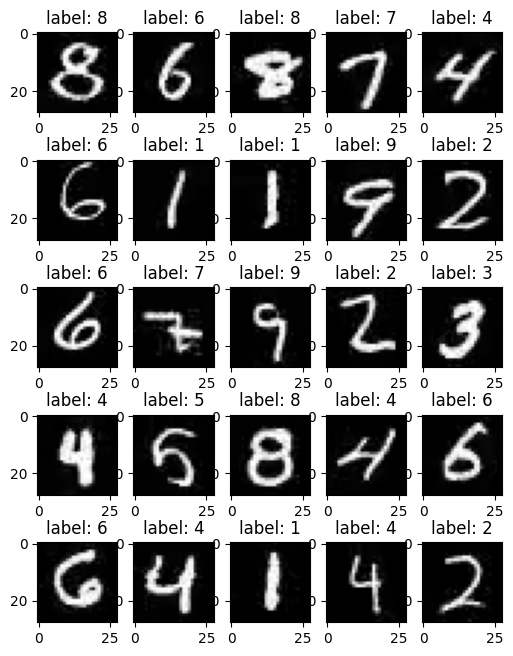

09-11-2022 20:08:28 ERROR [statement_binder:statement_binder.py:_bind_load_data_statement:0114] Video table MNISTVid already exists.
09-11-2022 20:08:28 WARNING[command_handler:command_handler.py:handle_request:0075] Video table MNISTVid already exists.
09-11-2022 20:08:28 WARNING[create_udf_executor:create_udf_executor.py:exec:0042] UDF MnistCNN already exists, nothing added.
09-11-2022 20:08:28 WARNING[generic_utils:generic_utils.py:path_to_class:0060] /home/jarulraj3/eva/tutorials/apps/mnist/eva_mnist_udf.py
09-11-2022 20:08:28 WARNING[generic_utils:generic_utils.py:path_to_class:0062] /home/jarulraj3/eva/tutorials/apps/mnist/eva_mnist_udf.py


In [10]:
# !pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=[6,8])

df = response.batch.frames
for axi in ax.flat:
    idx = np.random.randint(len(df))
    img = df['mnistvid.data'].iloc[idx]
    label = df['mnistcnn.label'].iloc[idx]
    axi.imshow(img)
    
    axi.set_title(f'label: {label}')

plt.show()

## Stop EVA server

In [ ]:
%run 00-stop-server.ipynb
stop_eva_server()